В этом проекте нужно спрогнозировать стоимость домов в зависимости от входных данных.

# Загрузка библиотек и просмотр общей информации по датасетам 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from functools import partial





sns.set(style="white", palette="muted", color_codes=True)
%matplotlib inline

Подгружаем датасеты

In [2]:
train = pd.read_csv('datasets/train.csv')
test = pd.read_csv('datasets/test.csv')

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

In [7]:
# этой функцией буду считать пропуски
def show_nan(data):
    try:
        for column in data.columns:
            if data[column].isnull().sum() > 0:
                print(f'Количество пропусков в столбце {column} = {data[column].isnull().sum()}')
    except AttributeError:
        print(f'Количество пропусков в столбце {data.isnull().sum()}')

In [8]:
def show_train_test_col(colname):
    print(f'Количество пропусков в {colname} в обучающем наборе = {train[colname].isnull().sum()}')
    print(f'Количество пропусков в {colname} в тестовом наборе = {test[colname].isnull().sum()}')

In [9]:
show_nan(train)

Количество пропусков в столбце LotFrontage = 259
Количество пропусков в столбце Alley = 1369
Количество пропусков в столбце MasVnrType = 8
Количество пропусков в столбце MasVnrArea = 8
Количество пропусков в столбце BsmtQual = 37
Количество пропусков в столбце BsmtCond = 37
Количество пропусков в столбце BsmtExposure = 38
Количество пропусков в столбце BsmtFinType1 = 37
Количество пропусков в столбце BsmtFinType2 = 38
Количество пропусков в столбце Electrical = 1
Количество пропусков в столбце FireplaceQu = 690
Количество пропусков в столбце GarageType = 81
Количество пропусков в столбце GarageYrBlt = 81
Количество пропусков в столбце GarageFinish = 81
Количество пропусков в столбце GarageQual = 81
Количество пропусков в столбце GarageCond = 81
Количество пропусков в столбце PoolQC = 1453
Количество пропусков в столбце Fence = 1179
Количество пропусков в столбце MiscFeature = 1406


In [10]:
show_nan(test)

Количество пропусков в столбце MSZoning = 4
Количество пропусков в столбце LotFrontage = 227
Количество пропусков в столбце Alley = 1352
Количество пропусков в столбце Utilities = 2
Количество пропусков в столбце Exterior1st = 1
Количество пропусков в столбце Exterior2nd = 1
Количество пропусков в столбце MasVnrType = 16
Количество пропусков в столбце MasVnrArea = 15
Количество пропусков в столбце BsmtQual = 44
Количество пропусков в столбце BsmtCond = 45
Количество пропусков в столбце BsmtExposure = 44
Количество пропусков в столбце BsmtFinType1 = 42
Количество пропусков в столбце BsmtFinSF1 = 1
Количество пропусков в столбце BsmtFinType2 = 42
Количество пропусков в столбце BsmtFinSF2 = 1
Количество пропусков в столбце BsmtUnfSF = 1
Количество пропусков в столбце TotalBsmtSF = 1
Количество пропусков в столбце BsmtFullBath = 2
Количество пропусков в столбце BsmtHalfBath = 2
Количество пропусков в столбце KitchenQual = 1
Количество пропусков в столбце Functional = 2
Количество пропусков

Рассмотрим каждый признак в отдельности, посмотрим на распределения и построим гистограммы для обучающей и тестовой выборки:

**Признак MSSubClass**


Это признак означает класс здания

Построим гистограммы и боксплоты с помощью функции:

In [11]:
def show_hist_and_box(df_col):
    fig, axes = plt.subplots(2, 1, figsize=(16, 12))
    
    sns.distplot(df_col, bins=50, ax=axes[0])
    sns.boxplot(df_col, ax=axes[1])
    
    sns.despine()

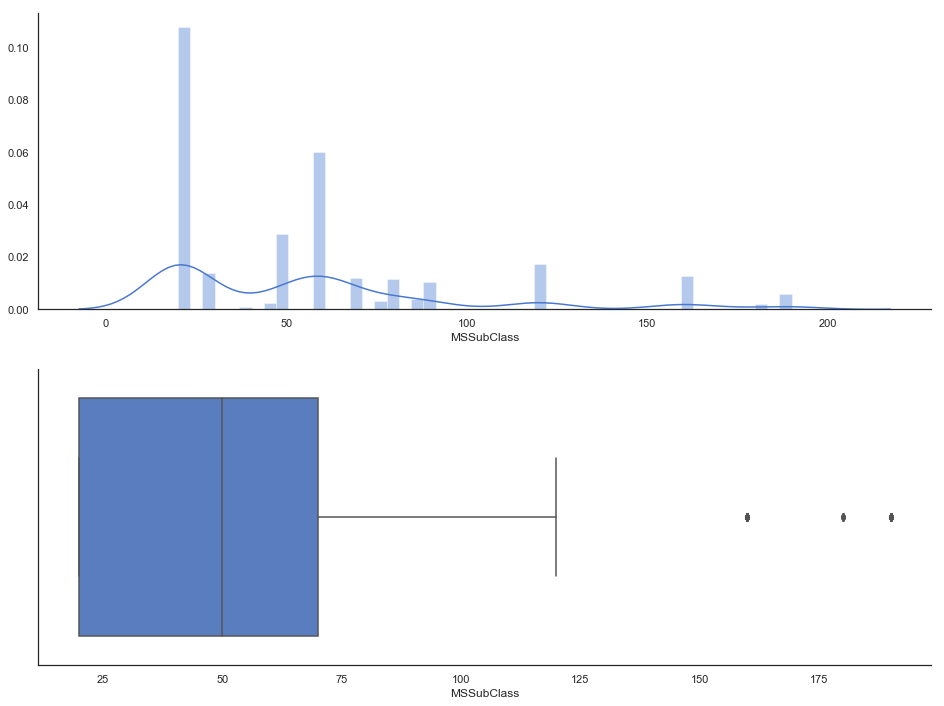

In [12]:
show_hist_and_box(train['MSSubClass'])

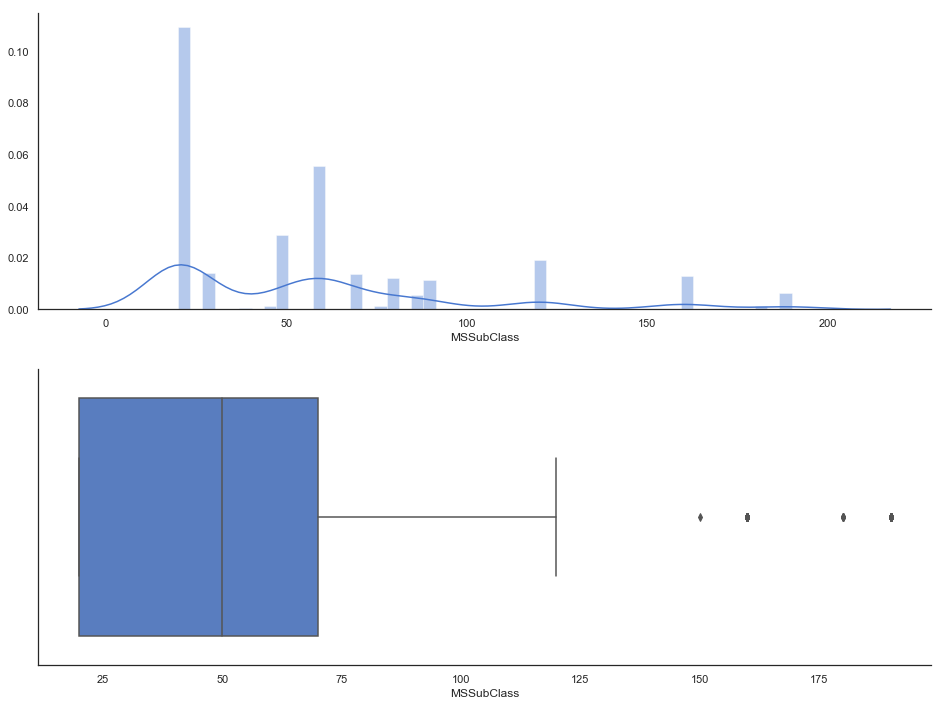

In [13]:
show_hist_and_box(test['MSSubClass'])

In [14]:
train['MSSubClass'].value_counts(ascending=False)

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

In [15]:
test['MSSubClass'].value_counts(ascending=False)

20     543
60     276
50     143
120     95
30      70
70      68
160     65
80      60
90      57
190     31
85      28
180      7
75       7
45       6
40       2
150      1
Name: MSSubClass, dtype: int64

In [16]:
show_train_test_col('MSSubClass')

Количество пропусков в MSSubClass в обучающем наборе = 0
Количество пропусков в MSSubClass в тестовом наборе = 0


**Признак MSZoning**

Этот признак означает классификацию по главной зоне

In [17]:
train['MSZoning'].unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [18]:
test['MSZoning'].unique()

array(['RH', 'RL', 'RM', 'FV', 'C (all)', nan], dtype=object)

Как видно, в тестовых признаках есть пропуски

In [19]:
show_nan(test['MSZoning'])

Количество пропусков в столбце 4


In [20]:
test['MSZoning'].value_counts()

RL         1114
RM          242
FV           74
C (all)      15
RH           10
Name: MSZoning, dtype: int64

Больше всего признаков RL, заполним этим значением пропуски:

In [21]:
test['MSZoning'] = test['MSZoning'].fillna('RL')

In [22]:
test['MSZoning'].value_counts()

RL         1118
RM          242
FV           74
C (all)      15
RH           10
Name: MSZoning, dtype: int64

**Признак LotFrontage**

Линейная длина улицы

c:\users\rusancovs\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\rusancovs\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
c:\users\rusancovs\appdata\local\programs\python\python37\lib\site-packages\statsmodels\nonparametric\kde.py:444: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # will not work for two columns.
c:\users\rusancovs\appdata\local\programs\python\python37\lib\site-packages\statsmodels\nonparametric\kde.py:444: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # will not work for two columns.


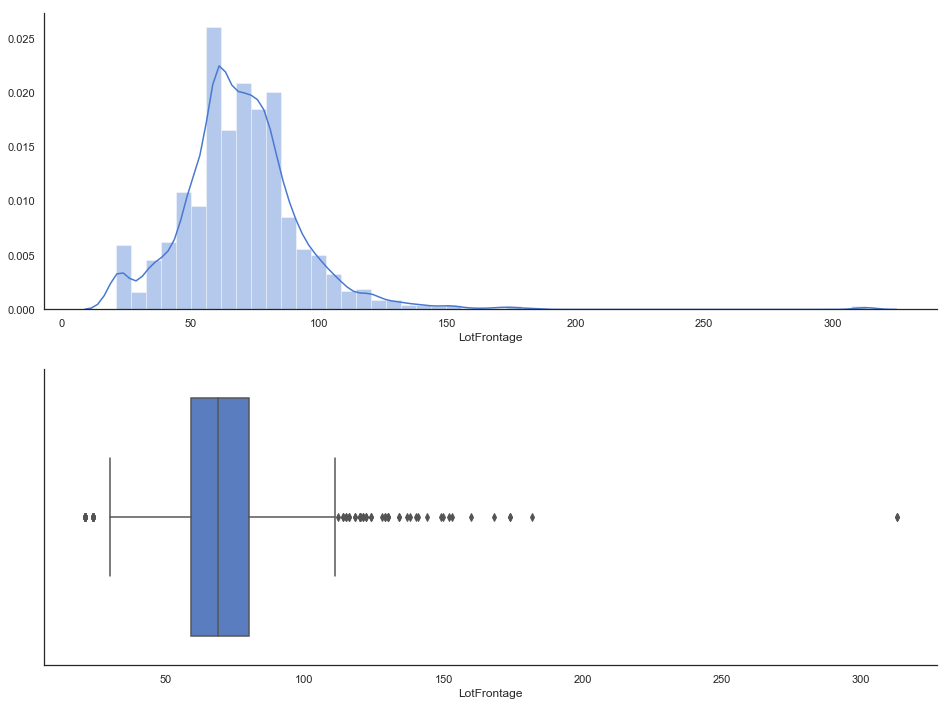

In [23]:
show_hist_and_box(train['LotFrontage'])

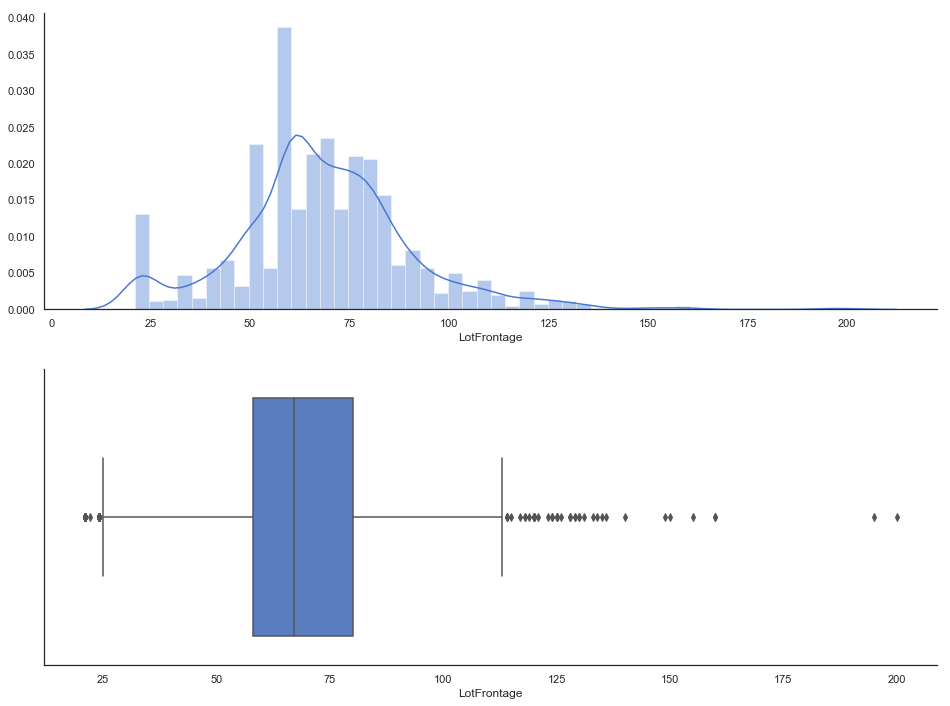

In [24]:
show_hist_and_box(test['LotFrontage'])

Удалим из обучающего набора признак > 200

In [25]:
train = train[train['LotFrontage'] < 200]

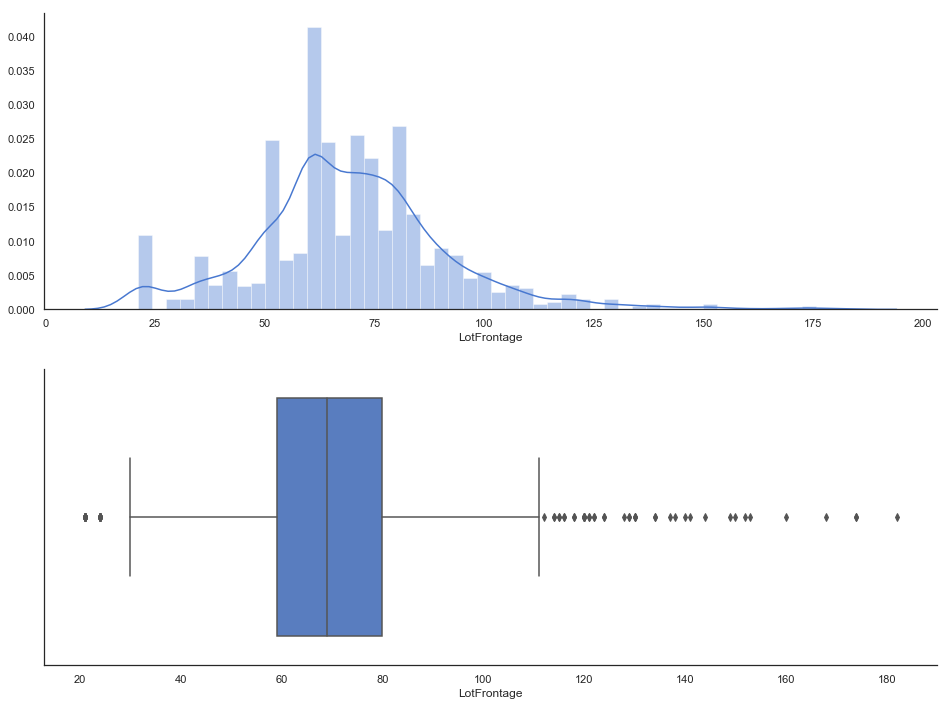

In [26]:
show_hist_and_box(train['LotFrontage'])

In [27]:
show_train_test_col('LotFrontage')

Количество пропусков в LotFrontage в обучающем наборе = 0
Количество пропусков в LotFrontage в тестовом наборе = 227


Заполним пропуски в тест медианным значением:

In [28]:
test['LotFrontage'] = test['LotFrontage'].fillna(test['LotFrontage'].median())

**Признак LotArea**

Размер зоны в квадратных фунтах

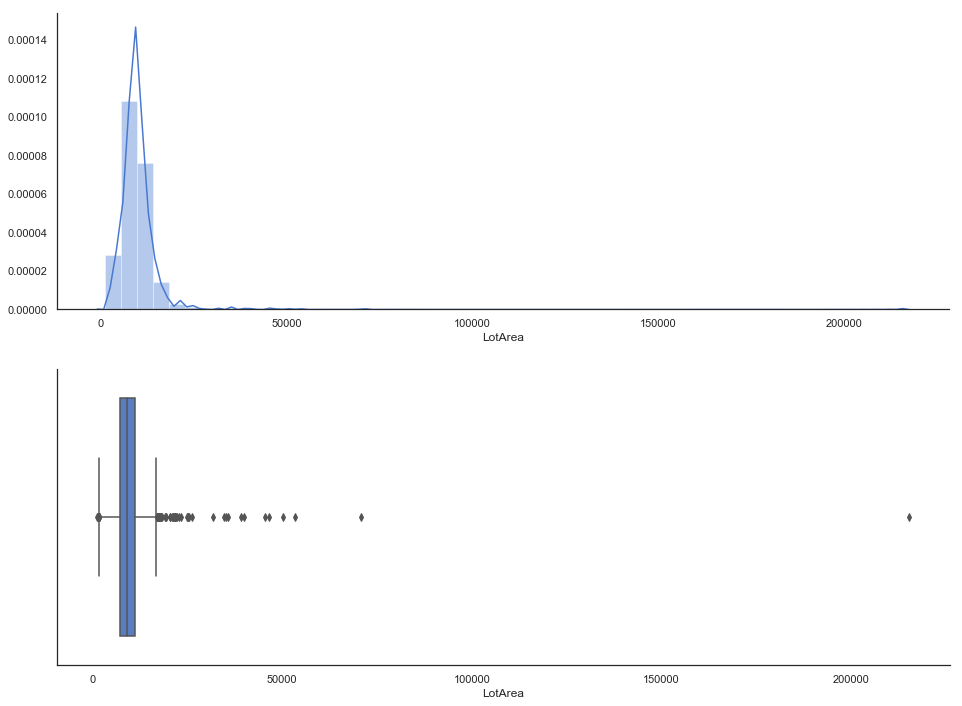

In [29]:
show_hist_and_box(train['LotArea'])

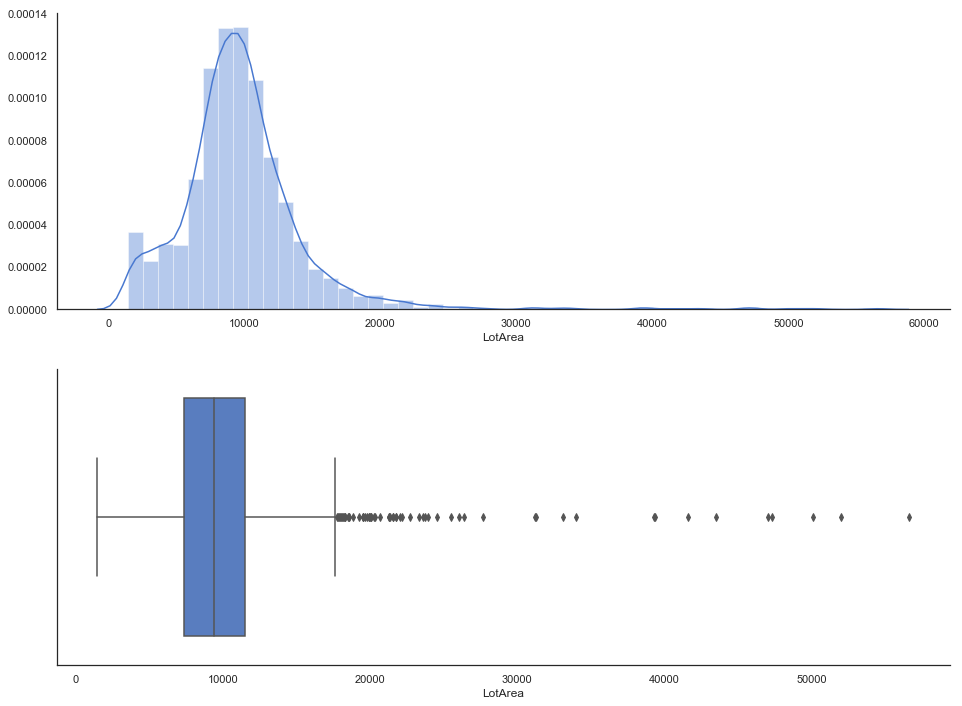

In [30]:
show_hist_and_box(test['LotArea'])

In [31]:
test['LotArea'].max()

56600

Удалим все выбросы выше 60000 в тренеровочном наборе данных

In [32]:
train['LotArea']

0        8450
1        9600
2       11250
3        9550
4       14260
        ...  
1455     7917
1456    13175
1457     9042
1458     9717
1459     9937
Name: LotArea, Length: 1199, dtype: int64

In [33]:
train = train[train['LotArea'] < 60000]

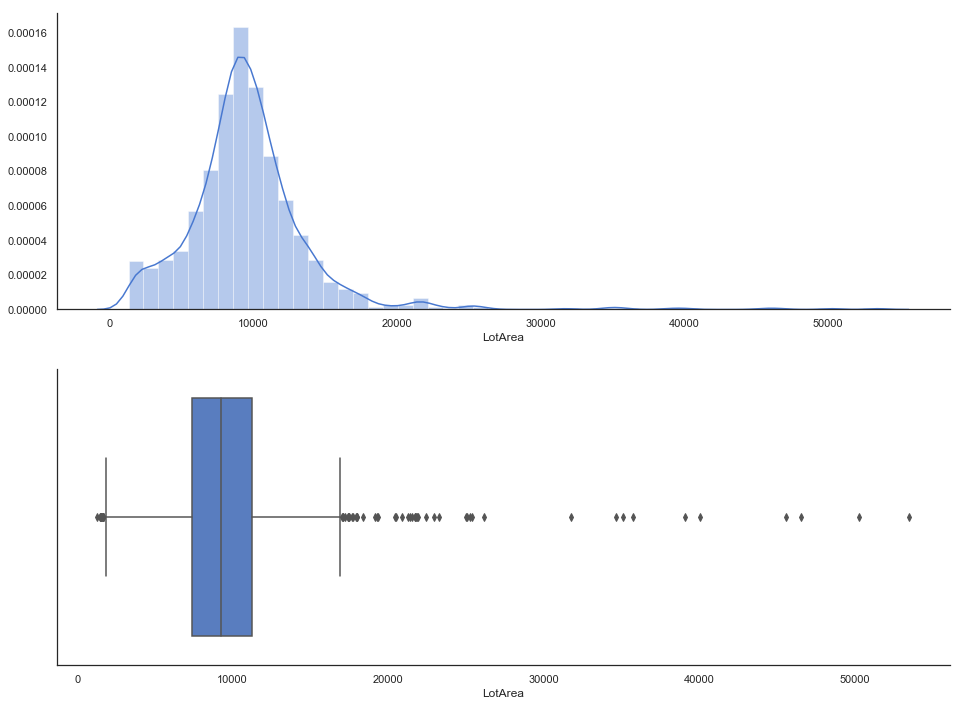

In [34]:
show_hist_and_box(train['LotArea'])

In [35]:
show_train_test_col('LotArea')

Количество пропусков в LotArea в обучающем наборе = 0
Количество пропусков в LotArea в тестовом наборе = 0


**Признак Street**

Доступность дороги

In [36]:
train['Street'].value_counts()

Pave    1192
Grvl       5
Name: Street, dtype: int64

In [37]:
test['Street'].value_counts()

Pave    1453
Grvl       6
Name: Street, dtype: int64

In [38]:
show_train_test_col('Street')

Количество пропусков в Street в обучающем наборе = 0
Количество пропусков в Street в тестовом наборе = 0


**Признак Alley**

Доступность аллеи

In [39]:
train['Alley'].value_counts()

Grvl    47
Pave    39
Name: Alley, dtype: int64

In [40]:
test['Alley'].value_counts()

Grvl    70
Pave    37
Name: Alley, dtype: int64

In [41]:
train[['Alley', 'Street']][train['Alley'].notnull()]

,Alley,Street
21,Grvl,Pave
30,Pave,Pave
56,Pave,Pave
79,Grvl,Pave
87,Pave,Pave
...,...,...
1404,Grvl,Pave
1414,Pave,Pave
1427,Grvl,Pave
1432,Grvl,Pave


Заполним все пропуски значениями Pave, так как, возможно аллей в брусчатке больше

In [42]:
for i in train, test:
    i['Alley'].fillna('Pave', inplace=True)

In [43]:
show_train_test_col('Alley')

Количество пропусков в Alley в обучающем наборе = 0
Количество пропусков в Alley в тестовом наборе = 0


**Признак LotShape**

Общая форма собственности

In [44]:
train['LotShape'].value_counts()

Reg    851
IR1    316
IR2     25
IR3      5
Name: LotShape, dtype: int64

In [45]:
test['LotShape'].value_counts()

Reg    934
IR1    484
IR2     35
IR3      6
Name: LotShape, dtype: int64

In [46]:
show_train_test_col('LotShape')

Количество пропусков в LotShape в обучающем наборе = 0
Количество пропусков в LotShape в тестовом наборе = 0


**Признак LandContour**

Право собственности

In [47]:
train['LandContour'].value_counts()

Lvl    1082
Bnk      55
HLS      45
Low      15
Name: LandContour, dtype: int64

In [48]:
test['LandContour'].value_counts()

Lvl    1311
HLS      70
Bnk      54
Low      24
Name: LandContour, dtype: int64

In [49]:
show_train_test_col('LandContour')

Количество пропусков в LandContour в обучающем наборе = 0
Количество пропусков в LandContour в тестовом наборе = 0


**Признак Utilities**

Тип доступных коммунальных услуг

In [50]:
train['Utilities'].value_counts()

AllPub    1197
Name: Utilities, dtype: int64

In [51]:
test['Utilities'].value_counts()

AllPub    1457
Name: Utilities, dtype: int64

In [52]:
show_train_test_col('Utilities')

Количество пропусков в Utilities в обучающем наборе = 0
Количество пропусков в Utilities в тестовом наборе = 2


In [53]:
# заполним пропуски в тест
test['Utilities'].fillna('AllPub', inplace=True)

In [54]:
test['Utilities'].value_counts()

AllPub    1459
Name: Utilities, dtype: int64

**Признак LotConfig**

Конфигурация лота

In [55]:
train['LotConfig'].value_counts()

Inside     915
Corner     200
CulDSac     45
FR2         33
FR3          4
Name: LotConfig, dtype: int64

In [56]:
test['LotConfig'].value_counts()

Inside     1081
Corner      248
CulDSac      82
FR2          38
FR3          10
Name: LotConfig, dtype: int64

In [57]:
show_train_test_col('LotConfig')

Количество пропусков в LotConfig в обучающем наборе = 0
Количество пропусков в LotConfig в тестовом наборе = 0


**Признак LandSlope**

Уклон места

In [58]:
train['LandSlope'].value_counts()

Gtl    1147
Mod      46
Sev       4
Name: LandSlope, dtype: int64

In [59]:
test['LandSlope'].value_counts()

Gtl    1396
Mod      60
Sev       3
Name: LandSlope, dtype: int64

In [60]:
show_train_test_col('LandSlope')

Количество пропусков в LandSlope в обучающем наборе = 0
Количество пропусков в LandSlope в тестовом наборе = 0


**Признак Neighborhood**

Физическое положение в пределах Ames city

In [61]:
train['Neighborhood'].value_counts()

NAmes      185
CollgCr    126
OldTown    109
Edwards     91
Somerst     78
NridgHt     76
BrkSide     51
SawyerW     50
Gilbert     49
Sawyer      48
NWAmes      45
Crawfor     41
Mitchel     36
IDOTRR      34
NoRidge     33
Timber      29
SWISU       23
StoneBr     20
BrDale      16
MeadowV     15
Blmngtn     14
ClearCr     12
NPkVill      7
Veenker      7
Blueste      2
Name: Neighborhood, dtype: int64

In [62]:
test['Neighborhood'].value_counts()

NAmes      218
OldTown    126
CollgCr    117
Somerst     96
Edwards     94
NridgHt     89
Gilbert     86
Sawyer      77
SawyerW     66
Mitchel     65
NWAmes      58
IDOTRR      56
Crawfor     52
BrkSide     50
Timber      34
NoRidge     30
StoneBr     26
SWISU       23
MeadowV     20
ClearCr     16
BrDale      14
NPkVill     14
Veenker     13
Blmngtn     11
Blueste      8
Name: Neighborhood, dtype: int64

In [63]:
show_train_test_col('Neighborhood')

Количество пропусков в Neighborhood в обучающем наборе = 0
Количество пропусков в Neighborhood в тестовом наборе = 0


**Признак Condition1**

Близость к главной дороге или железной дороге

In [64]:
train['Condition1'].value_counts()

Norm      1035
Feedr       66
Artery      46
RRAn        24
RRAe         9
PosN         9
RRNn         4
PosA         3
RRNe         1
Name: Condition1, dtype: int64

In [65]:
test['Condition1'].value_counts()

Norm      1251
Feedr       83
Artery      44
RRAn        24
PosN        20
RRAe        17
PosA        12
RRNn         4
RRNe         4
Name: Condition1, dtype: int64

In [66]:
show_train_test_col('Condition1')

Количество пропусков в Condition1 в обучающем наборе = 0
Количество пропусков в Condition1 в тестовом наборе = 0


**Признак Condition1**

In [67]:
train['Condition2'].value_counts()

Norm      1184
Feedr        6
RRNn         2
PosN         2
Artery       2
PosA         1
Name: Condition2, dtype: int64

In [68]:
test['Condition2'].value_counts()

Norm      1444
Feedr        7
Artery       3
PosA         3
PosN         2
Name: Condition2, dtype: int64

In [69]:
show_train_test_col('Condition2')

Количество пропусков в Condition2 в обучающем наборе = 0
Количество пропусков в Condition2 в тестовом наборе = 0


**Признак BldgType**

Тип здания

In [70]:
train['BldgType'].value_counts()

1Fam      990
TwnhsE     92
Duplex     47
Twnhs      40
2fmCon     28
Name: BldgType, dtype: int64

In [71]:
test['BldgType'].value_counts()

1Fam      1205
TwnhsE     113
Duplex      57
Twnhs       53
2fmCon      31
Name: BldgType, dtype: int64

In [72]:
show_train_test_col('BldgType')

Количество пропусков в BldgType в обучающем наборе = 0
Количество пропусков в BldgType в тестовом наборе = 0


**Признак HouseStyle**

Стиль здания

In [73]:
train['HouseStyle'].value_counts()

1Story    595
2Story    361
1.5Fin    136
SLvl       44
SFoyer     30
1.5Unf     13
2.5Unf     10
2.5Fin      8
Name: HouseStyle, dtype: int64

In [74]:
test['HouseStyle'].value_counts()

1Story    745
2Story    427
1.5Fin    160
SLvl       63
SFoyer     46
2.5Unf     13
1.5Unf      5
Name: HouseStyle, dtype: int64

В обучающем наборе есть 8 признаков 2.5 fin. Возможно это ошибка, сделаем эти признаки 1.5fin

In [75]:
train.loc[train['HouseStyle'] == '2.5Fin', 'HouseStyle'] = '1.5Fin'

In [76]:
train['HouseStyle'].value_counts()

1Story    595
2Story    361
1.5Fin    144
SLvl       44
SFoyer     30
1.5Unf     13
2.5Unf     10
Name: HouseStyle, dtype: int64

In [77]:
show_train_test_col('HouseStyle')

Количество пропусков в HouseStyle в обучающем наборе = 0
Количество пропусков в HouseStyle в тестовом наборе = 0


**Признак OverallQual**

Общее качество материала и отделки

In [78]:
train['OverallQual'].value_counts()

5     333
6     282
7     263
8     142
4      98
9      42
3      17
10     16
2       3
1       1
Name: OverallQual, dtype: int64

In [79]:
test['OverallQual'].value_counts()

5     428
6     357
7     281
8     174
4     110
9      64
3      20
10     13
2      10
1       2
Name: OverallQual, dtype: int64

In [80]:
show_train_test_col('OverallQual')

Количество пропусков в OverallQual в обучающем наборе = 0
Количество пропусков в OverallQual в тестовом наборе = 0


**Признак OverallCond**

Общий рейтинг состояния

In [81]:
train['OverallCond'].value_counts()

5    681
6    206
7    164
8     60
4     46
3     20
9     15
2      5
Name: OverallCond, dtype: int64

In [82]:
test['OverallCond'].value_counts()

5    824
6    279
7    185
8     72
4     44
3     25
9     19
1      6
2      5
Name: OverallCond, dtype: int64

In [83]:
show_train_test_col('OverallCond')

Количество пропусков в OverallCond в обучающем наборе = 0
Количество пропусков в OverallCond в тестовом наборе = 0


**Признак YearBuilt**

Дата постройки

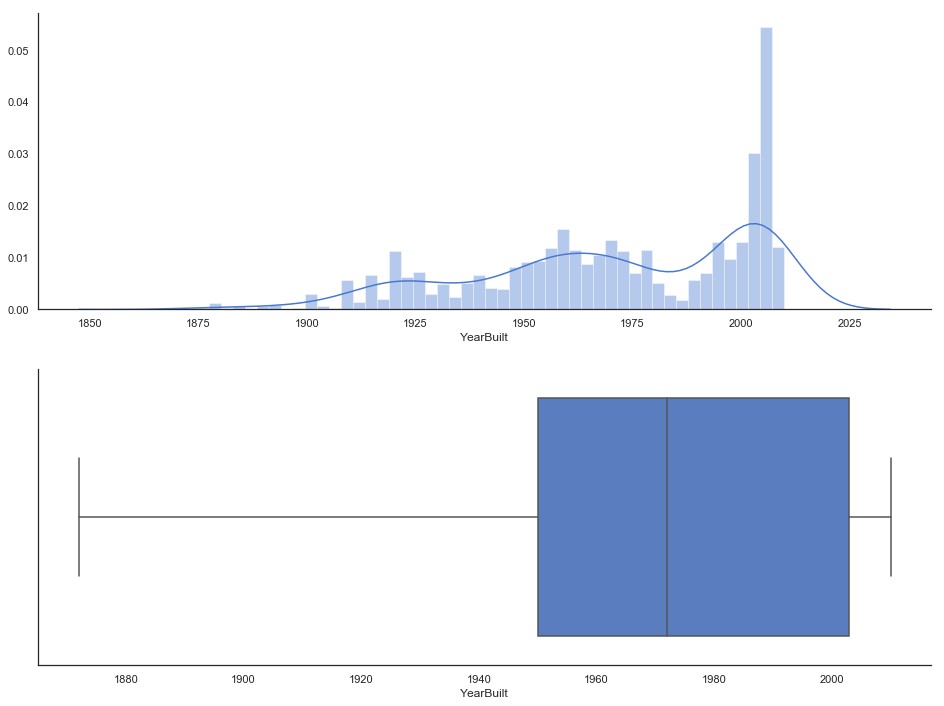

In [84]:
show_hist_and_box(train['YearBuilt'])

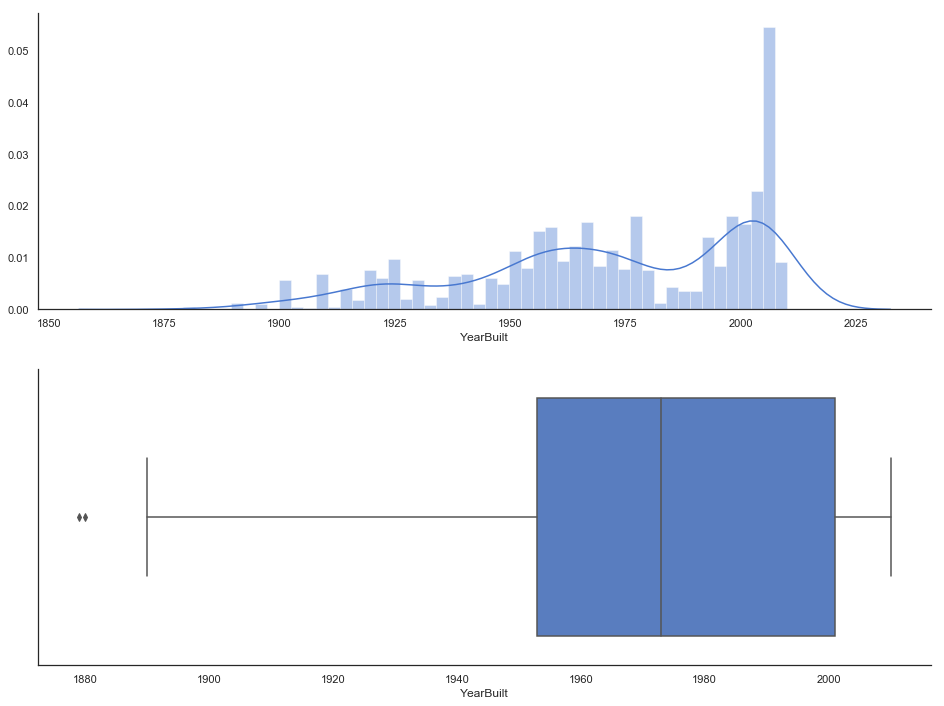

In [85]:
show_hist_and_box(test['YearBuilt'])

In [86]:
train = train[train['YearBuilt'] > 1878]

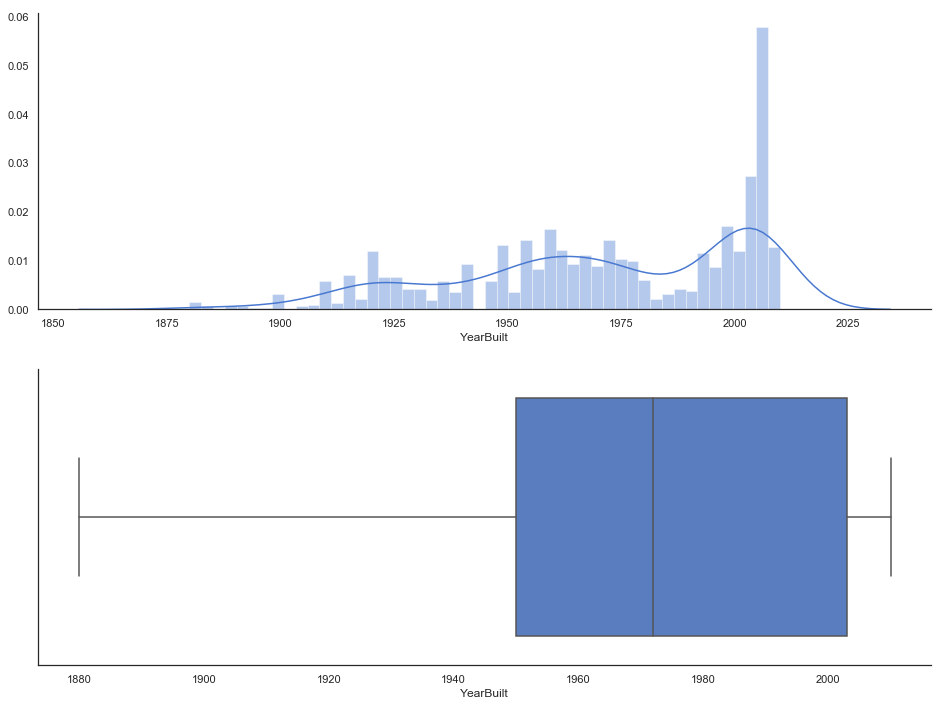

In [87]:
show_hist_and_box(train['YearBuilt'])

In [90]:
show_train_test_col('YearBuilt')

Количество пропусков в YearBuilt в обучающем наборе = 0
Количество пропусков в YearBuilt в тестовом наборе = 0


**Признак YearRemodAdd**

Дата перепланировки

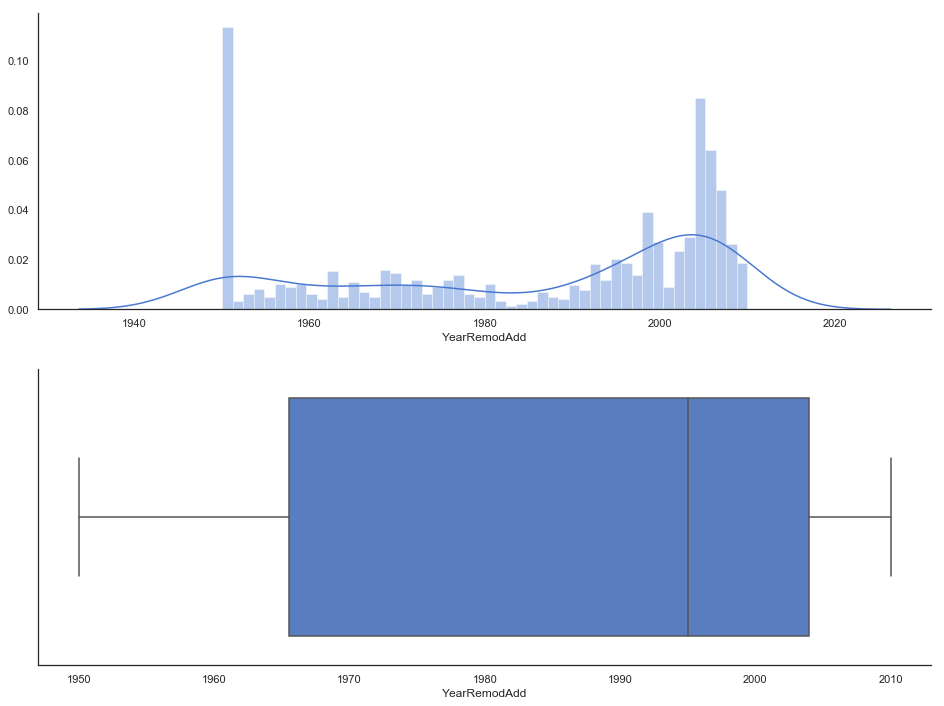

In [93]:
show_hist_and_box(train['YearRemodAdd'])

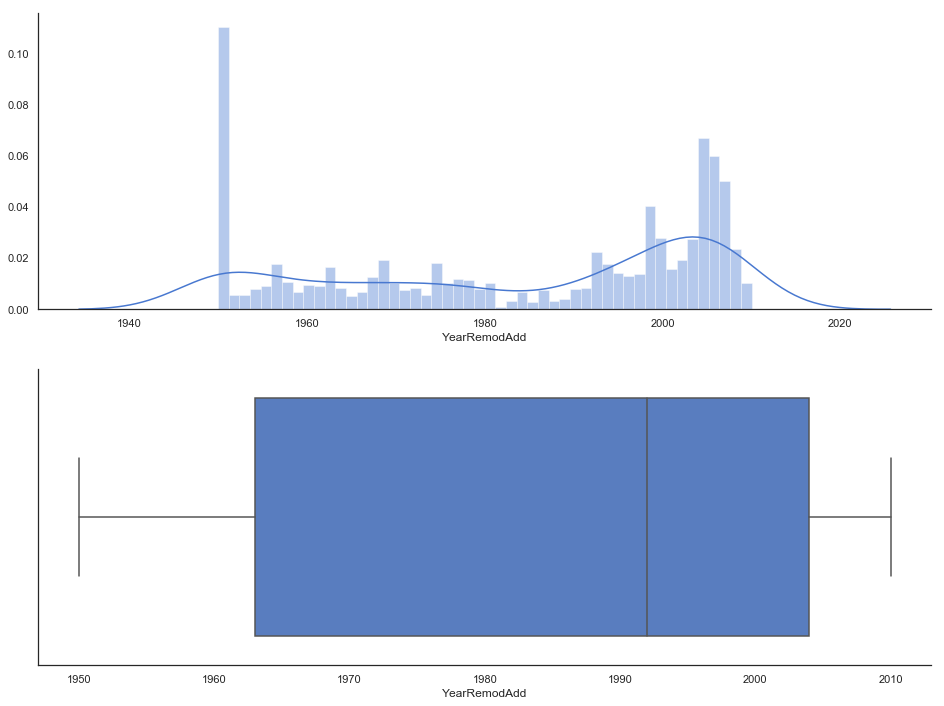

In [94]:
show_hist_and_box(test['YearRemodAdd'])

In [95]:
show_train_test_col('YearRemodAdd')

Количество пропусков в YearRemodAdd в обучающем наборе = 0
Количество пропусков в YearRemodAdd в тестовом наборе = 0


**Признак RoofStyle**

Тип крыши

In [96]:
train['RoofStyle'].value_counts()

Gable      932
Hip        239
Gambrel     11
Mansard      7
Flat         6
Name: RoofStyle, dtype: int64

In [97]:
test['RoofStyle'].value_counts()

Gable      1169
Hip         265
Gambrel      11
Flat          7
Mansard       4
Shed          3
Name: RoofStyle, dtype: int64

Переименуем shed в mansard в тестовых данных

In [98]:
test.loc[test['RoofStyle'] == 'Shed', 'RoofStyle'] = 'Mansard'

In [99]:
test['RoofStyle'].value_counts()

Gable      1169
Hip         265
Gambrel      11
Mansard       7
Flat          7
Name: RoofStyle, dtype: int64

In [100]:
show_train_test_col('RoofStyle')

Количество пропусков в RoofStyle в обучающем наборе = 0
Количество пропусков в RoofStyle в тестовом наборе = 0


**Признак RoofMatl**

Материал крыши

In [102]:
train['RoofMatl'].value_counts()

CompShg    1180
Tar&Grv       6
WdShngl       5
WdShake       2
Membran       1
Roll          1
Name: RoofMatl, dtype: int64

In [103]:
test['RoofMatl'].value_counts()

CompShg    1442
Tar&Grv      12
WdShake       4
WdShngl       1
Name: RoofMatl, dtype: int64

In [107]:
train = train[~train['RoofMatl'].isin(['Membran', 'Roll'])]

In [108]:
train['RoofMatl'].value_counts()

CompShg    1180
Tar&Grv       6
WdShngl       5
WdShake       2
Name: RoofMatl, dtype: int64

In [134]:
show_train_test_col('RoofMatl')

Количество пропусков в RoofMatl в обучающем наборе = 0
Количество пропусков в RoofMatl в тестовом наборе = 0


**Признак Exterior1st**

Материал покрытия крыши

In [111]:
len(train['Exterior1st'].value_counts())

15

In [112]:
len(test['Exterior1st'].value_counts())

13

In [129]:
sorted(train['Exterior1st'].value_counts().index)

['AsbShng',
 'AsphShn',
 'BrkComm',
 'BrkFace',
 'CBlock',
 'CemntBd',
 'HdBoard',
 'ImStucc',
 'MetalSd',
 'Plywood',
 'Stone',
 'Stucco',
 'VinylSd',
 'Wd Sdng',
 'WdShing']

In [130]:
sorted(test['Exterior1st'].value_counts().index)

['AsbShng',
 'AsphShn',
 'BrkComm',
 'BrkFace',
 'CBlock',
 'CemntBd',
 'HdBoard',
 'MetalSd',
 'Plywood',
 'Stucco',
 'VinylSd',
 'Wd Sdng',
 'WdShing']

In [131]:
train['Exterior1st'].value_counts()

VinylSd    446
MetalSd    188
Wd Sdng    167
HdBoard    160
Plywood     69
CemntBd     54
BrkFace     40
WdShing     25
Stucco      20
AsbShng     18
BrkComm      2
AsphShn      1
ImStucc      1
CBlock       1
Stone        1
Name: Exterior1st, dtype: int64

In [138]:
test['Exterior1st'].value_counts()

VinylSd    510
MetalSd    230
HdBoard    220
Wd Sdng    205
Plywood    113
CemntBd     65
BrkFace     37
WdShing     30
AsbShng     24
Stucco      18
BrkComm      4
AsphShn      1
CBlock       1
Name: Exterior1st, dtype: int64

Удалим из обучающей выборки ImStucc и Stone

In [132]:
train = train[~train['Exterior1st'].isin(['ImStucc', 'Stone'])]

In [135]:
show_train_test_col('Exterior1st')

Количество пропусков в Exterior1st в обучающем наборе = 0
Количество пропусков в Exterior1st в тестовом наборе = 1


In [139]:
test[test['Exterior1st'].isnull()][['RoofMatl', 'RoofStyle', 'Exterior1st']]

,RoofMatl,RoofStyle,Exterior1st
691,Tar&Grv,Flat,NaN


In [141]:
test[(test['RoofMatl'] == 'Tar&Grv') & (test['RoofStyle'] == 'Flat')]['Exterior1st'].value_counts()

Plywood    4
Wd Sdng    1
WdShing    1
Name: Exterior1st, dtype: int64

In [142]:
test['Exterior1st'].fillna('Plywood', inplace=True)

In [143]:
show_train_test_col('Exterior1st')

Количество пропусков в Exterior1st в обучающем наборе = 0
Количество пропусков в Exterior1st в тестовом наборе = 0


**Признак Exterior2nd**

In [146]:
len(train['Exterior2nd'].value_counts())

16

In [147]:
len(test['Exterior2nd'].value_counts())

15

In [148]:
train['Exterior2nd'].value_counts()

VinylSd    437
MetalSd    183
Wd Sdng    162
HdBoard    147
Plywood     92
CmentBd     54
Wd Shng     33
Stucco      21
BrkFace     21
AsbShng     18
ImStucc      8
Brk Cmn      7
AsphShn      3
Stone        3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64

In [149]:
test['Exterior2nd'].value_counts()

VinylSd    510
MetalSd    233
HdBoard    199
Wd Sdng    194
Plywood    128
CmentBd     66
Wd Shng     43
BrkFace     22
Stucco      21
AsbShng     18
Brk Cmn     15
ImStucc      5
CBlock       2
AsphShn      1
Stone        1
Name: Exterior2nd, dtype: int64

In [150]:
train = train[train['Exterior2nd'] != 'Other']

In [152]:
show_train_test_col('Exterior1st')

Количество пропусков в Exterior1st в обучающем наборе = 0
Количество пропусков в Exterior1st в тестовом наборе = 0
